# **Capstone Final Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from wordcloud import WordCloud

plt.style.use('fivethirtyeight')
sns.set_context("notebook")
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/Shared drives/STAT 482 Capstone Project'

# load the datasets
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

Mounted at /content/drive
/content/drive/Shared drives/STAT 482 Capstone Project


In [ ]:
print("Initial Data Loaded:")
display(movies.head())
display(credits.head())

Initial Data Loaded:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


**Data Exploration & Cleaning**

In [ ]:
movies.dropna(inplace=True)
movies = movies[movies['vote_average'] != 0]
movies = movies[movies['runtime'] != 0]
movies = movies[movies['budget'] != 0]
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1.340000e+03,1340.000000,1340.000000,1.340000e+03,1340.000000,1340.000000,1340.000000
mean,5.113249e+07,62258.217164,39.024397,1.719502e+08,110.062687,6.325896,1460.058955
std,5.426236e+07,87247.711855,49.773364,2.484850e+08,18.935619,0.867560,1842.356583
min,1.300000e+01,11.000000,0.048948,0.000000e+00,63.000000,2.000000,1.000000
25%,1.300000e+07,7297.500000,14.557506,2.026675e+07,96.000000,5.800000,294.750000
50%,3.000000e+07,23048.500000,27.912534,7.963383e+07,107.000000,6.300000,742.000000
75%,7.000000e+07,72459.500000,47.365812,2.116776e+08,121.000000,6.900000,1871.750000
max,3.800000e+08,394047.000000,875.581305,2.787965e+09,201.000000,8.400000,13752.000000


In [ ]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


Converting JSON to Strings

In [ ]:
# changing the genres column from json to string
movies['genres'] = movies['genres'].apply(json.loads)

for index, i in zip(movies.index, movies['genres']):
    list1 = []

    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre

    movies.loc[index, 'genres'] = str(list1)

# changing the keywords column from json to string
movies['keywords'] = movies['keywords'].apply(json.loads)

for index, i in zip(movies.index, movies['keywords']):
    list1 = []

    for j in range(len(i)):
        list1.append((i[j]['name']))

    movies.loc[index, 'keywords'] = str(list1)

# changing the production_companies column from json to string
movies['production_companies'] = movies['production_companies'].apply(json.loads)

for index, i in zip(movies.index, movies['production_companies']):
    list1 = []

    for j in range(len(i)):
        list1.append((i[j]['name']))

    movies.loc[index, 'production_companies'] = str(list1)

# changing the cast column from json to string
credits['cast'] = credits['cast'].apply(json.loads)

for index, i in zip(credits.index, credits['cast']):
    list1 = []

    for j in range(len(i)):
        list1.append((i[j]['name']))

    credits.loc[index,'cast'] = str(list1)

# changing the crew column from json to string
credits['crew'] = credits['crew'].apply(json.loads)

def director(x):

    for i in x:

        if i['job'] == 'Director':

            return i['name']

credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [ ]:
print(movies.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [ ]:
movies.iloc[25]

,29
budget,200000000
genres,"['Action', 'Adventure', 'Thriller']"
homepage,http://www.skyfall-movie.com
id,37724
keywords,"['spy', 'secret agent', 'sociopath', 'killer',..."
original_language,en
original_title,Skyfall
overview,When Bond's latest assignment goes gravely wro...
popularity,93.004993
production_companies,['Columbia Pictures']


Merging the two csv files

In [ ]:
movies = movies.merge(credits, left_on='id', right_on='movie_id', how='left')
movies = movies[['id', 'original_title', 'genres', 'cast', 'vote_average', 'director', 'keywords']]

In [ ]:
movies.iloc[25]

,25
id,37724
original_title,Skyfall
genres,"['Action', 'Adventure', 'Thriller']"
cast,"['Daniel Craig', 'Judi Dench', 'Javier Bardem'..."
vote_average,6.9
director,Sam Mendes
keywords,"['spy', 'secret agent', 'sociopath', 'killer',..."


In [ ]:
movies.shape

(1340, 7)

In [ ]:
movies.size

9380

In [ ]:
movies.index

RangeIndex(start=0, stop=1340, step=1)

In [ ]:
movies.columns

Index(['id', 'original_title', 'genres', 'cast', 'vote_average', 'director',
       'keywords'],
      dtype='object')

In [ ]:
movies.dtypes

,0
id,int64
original_title,object
genres,object
cast,object
vote_average,float64
director,object
keywords,object


**Exploratory Data Analysis**

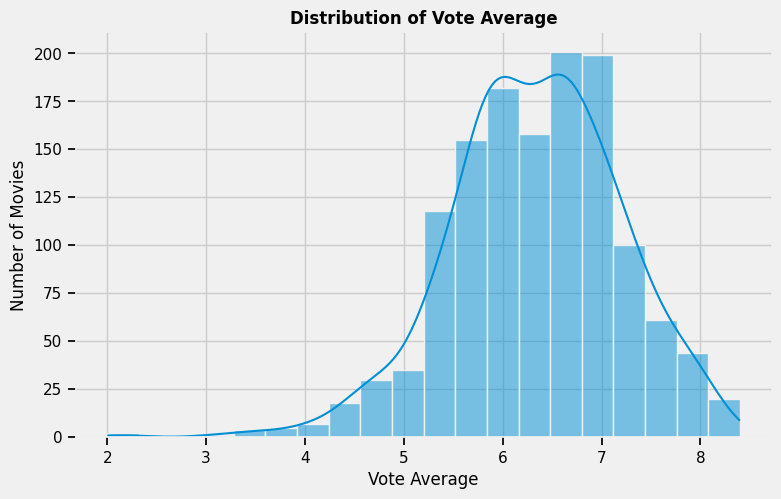

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(movies['vote_average'], bins=20, kde=True)
plt.title('Distribution of Vote Average', weight='bold')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

Shows most movies are clustered around ratings of 5 to 7. (There's a bit of left skew — not many movies have extremely low or high scores.)

**Looking at the Genres Column**

In [ ]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

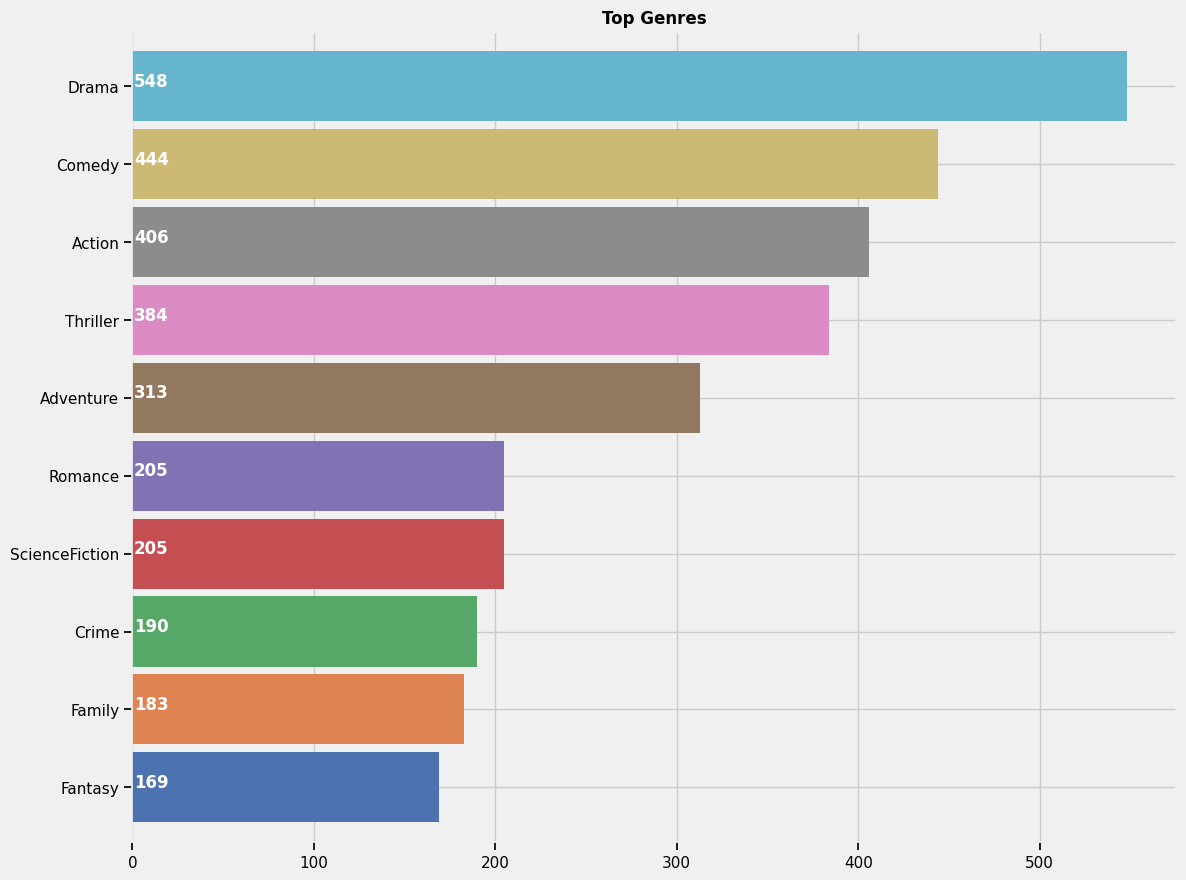

In [ ]:
plt.subplots(figsize=(12,10))
list1 = []

for i in movies['genres']:
    list1.extend(i)

ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('deep',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.8, i, v, fontsize=12, color='white', weight='bold')

plt.title('Top Genres', weight='bold')
plt.show()

As seen in the visual above, it appears the Drama is the most popular genre followed by Comedy and Thriller.

In [ ]:
for i,j in zip(movies['genres'], movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)

movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [ ]:
genreList = []

for index, row in movies.iterrows():
    genres = row["genres"]

    for genre in genres:

        if genre not in genreList:
            genreList.append(genre)

genreList[:10] # now we have a list with unique genres

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

One Hot Encoding for multiple labels

In [ ]:
def binary(genre_list):
    binaryList = []

    for genre in genreList:

        if genre in genre_list:
            binaryList.append(1)

        else:
            binaryList.append(0)

    return binaryList

In [ ]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

,genres_bin
0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


**Looking at the Cast Column**

In [ ]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

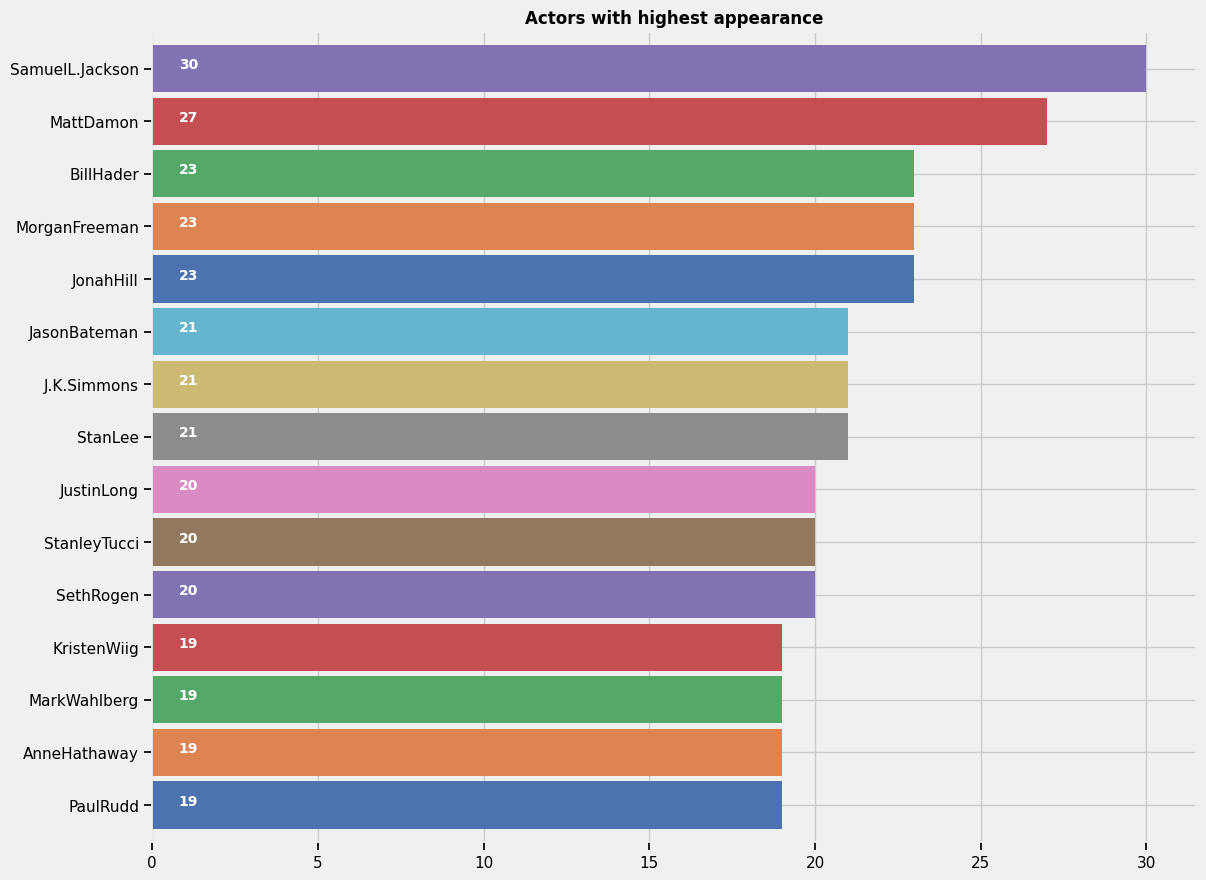

In [ ]:
plt.subplots(figsize=(12,10))
list1=[]

for i in movies['cast']:
    list1.extend(i)

ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('deep', 40))

for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values):
    ax.text(.8, i, v, fontsize=10, color='white', weight='bold')

plt.title('Actors with highest appearance', weight='bold')
plt.show()

In [ ]:
for i,j in zip(movies['cast'], movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j, 'cast'] = str(list2)

movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')

for i,j in zip(movies['cast'], movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j, 'cast'] = str(list2)

movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [ ]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]

    for i in cast:
        if i not in castList:
            castList.append(i)

In [ ]:
def binary(cast_list):
    binaryList = []

    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList

In [ ]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
movies['cast_bin'].head()

,cast_bin
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ..."
2,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ..."
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ..."


**Looking at the Director Column**

In [ ]:
def xstr(s):

    if s is None:
        return ''

    return str(s)

movies['director'] = movies['director'].apply(xstr)

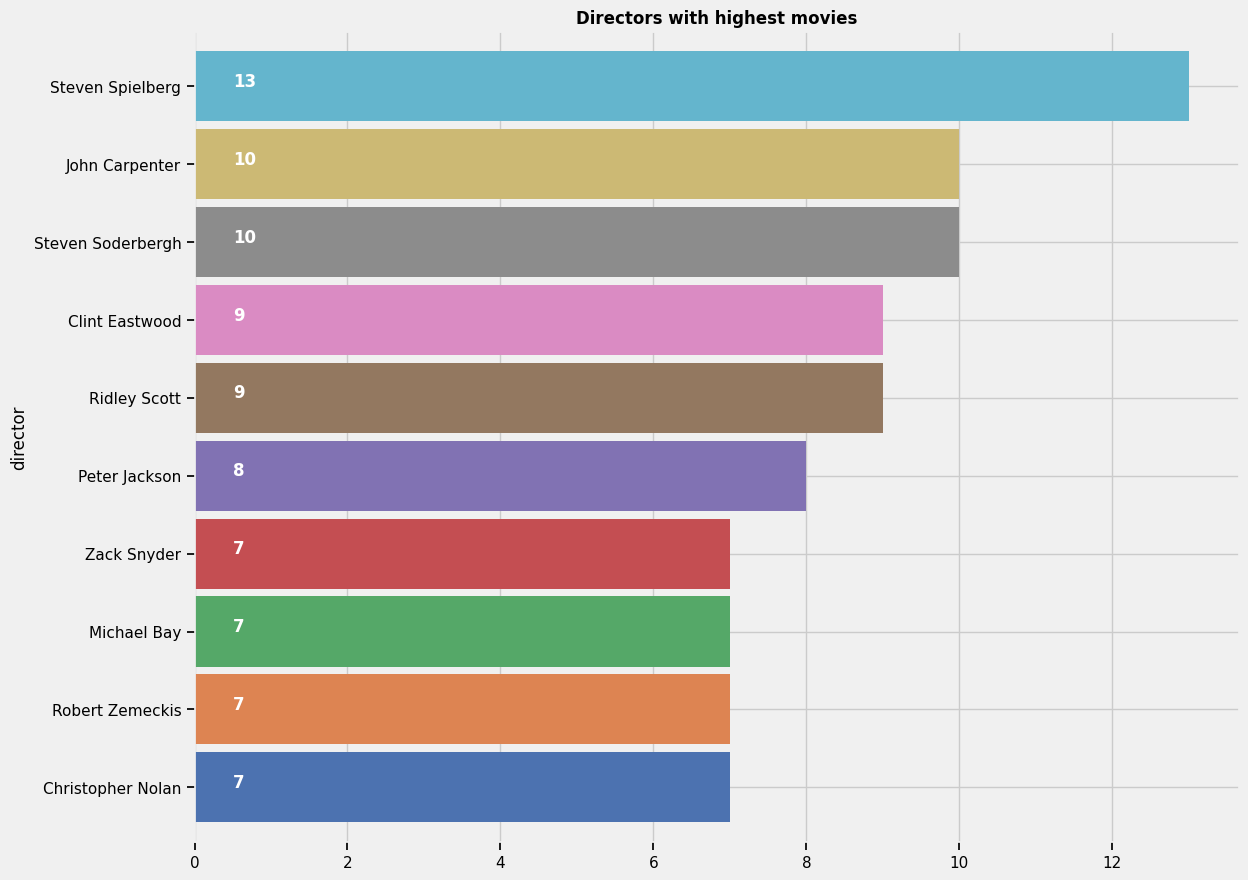

In [ ]:
plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('deep', 40))

for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.5, i, v, fontsize=12, color='white', weight='bold')

plt.title('Directors with highest movies', weight='bold')
plt.show()

In [ ]:
directorList=[]

for i in movies['director']:

    if i not in directorList:
        directorList.append(i)

In [ ]:
def binary(director_list):
    binaryList = []

    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList

In [ ]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
movies.head()

,id,original_title,genres,cast,vote_average,director,keywords,genres_bin,cast_bin,director_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","SamWorthington,SigourneyWeaver,StephenLang,Zoe...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]","JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]","ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","AnneHathaway,ChristianBale,GaryOldman,MichaelC...",7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","LynnCollins,SamanthaMorton,TaylorKitsch,Willem...",6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


**Looking at the Keywords column**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-9dc297f126b7>", line 2, in <cell line: 0>
    import nltk
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1138, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 1078, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1507, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1476, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1434, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    st

In [ ]:
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords'] = movies['keywords'].str.split(',')

for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    movies.loc[j, 'keywords'] = str(list2)

movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')

for i,j in zip(movies['keywords'], movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'keywords'] = str(list2)

movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')

In [ ]:
words_list = []

for index, row in movies.iterrows():
    genres = row["keywords"]

    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [ ]:
def binary(words):
    binaryList = []

    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList

In [ ]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
movies = movies[(movies['vote_average']!=0)] # removing the movies with 0 score and without director names
movies = movies[movies['director']!='']

**Similarities between Movies**

In [ ]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]

    genresA = a['genres_bin']
    genresB = b['genres_bin']

    genreDistance = spatial.distance.cosine(genresA, genresB)

    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)

    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)

    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)

    return genreDistance + directDistance + scoreDistance + wordsDistance

In [ ]:
Similarity(3,160) # checking similarity between any 2 random movies

np.float64(3.3603978509331687)

From the code above, we see that the distance is about 2.068, which is high. The greater the distance, the less similar movies are. Let's see what these random movies actually were.

In [ ]:
print(movies.iloc[3])
print(movies.iloc[160])

id                                                            49026
original_title                                The Dark Knight Rises
genres                             [Action, Crime, Drama, Thriller]
cast              AnneHathaway,ChristianBale,GaryOldman,MichaelC...
vote_average                                                    7.6
director                                          Christopher Nolan
keywords          [batman, burglar, catburglar, catwoman, cover-...
genres_bin        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin          [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
director_bin      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 3, dtype: object
id                                                            70981
original_title                                           Prometheus
genres                         [Adventure, Mystery, ScienceFiction]
cast              GuyPear

From our check, it is quite clear that The Dark Knight Rises and How to Train your Dragon 2 are very different movies. This explains why the distance was so large.

In [ ]:
new_id = list(range(0, movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title', 'genres', 'keywords','cast', 'vote_average', 'genres_bin', 'cast_bin', 'new_id', 'director', 'director_bin', 'words_bin']]
movies.head()

,original_title,genres,keywords,cast,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[3d, alien, alienplanet, antiwar, battle, cgi,...","SamWorthington,SigourneyWeaver,StephenLang,Zoe...",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]","[aftercreditsstinger, afterlife, alliance, cal...","JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Spectre,"[Action, Adventure, Crime]","[basedonnovel, britishsecretservice, mi6, secr...","ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,Sam Mendes,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[batman, burglar, catburglar, catwoman, cover-...","AnneHathaway,ChristianBale,GaryOldman,MichaelC...",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",3,Christopher Nolan,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,John Carter,"[Action, Adventure, ScienceFiction]","[19thcentury, 3d, alien, alienrace, basedonnov...","LynnCollins,SamanthaMorton,TaylorKitsch,Willem...",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",4,Andrew Stanton,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


**Now for a Score Predictor**

In [ ]:
import operator

def predict_score(name):
    # Convert user input to lowercase
    name = name.lower()

    # Create a lowercase version of the movie titles (once)
    if 'original_title_lower' not in movies.columns:
        movies['original_title_lower'] = movies['original_title'].str.lower()

    # Match movie by lowercase input
    matching_movies = movies[movies['original_title_lower'].str.contains(name, na=False)]

    if matching_movies.empty:
        print("No movie found matching that name.")
        return

    new_movie = matching_movies.iloc[0].to_frame().T
    print('Selected Movie: ', new_movie.original_title.values[0])

    def getNeighbors(baseMovie, K):
        distances = []

        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))

        distances.sort(key=operator.itemgetter(1))
        neighbors = []

        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)

    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating += movies.iloc[neighbor[0]]['vote_average']
        print(
            movies.iloc[neighbor[0]]['original_title'] +
            " | Genres: " + str(movies.iloc[neighbor[0]]['genres']).strip('[]').replace(' ', '') +
            " | Rating: " + str(movies.iloc[neighbor[0]]['vote_average'])
        )

    print('\n')
    avgRating /= K
    print(f"The predicted rating for {new_movie['original_title'].values[0]} is: {avgRating:.2f}")
    print(f"The actual rating for {new_movie['original_title'].values[0]} is {new_movie['vote_average'].values[0]}")

Now let's test...

In [ ]:
predict_score('Godfather')

Selected Movie:  The Godfather: Part III

Recommended Movies: 

The Godfather | Genres: 'Crime','Drama' | Rating: 8.4
Apocalypse Now | Genres: 'Drama','War' | Rating: 8.0
Twixt | Genres: 'Horror','Thriller' | Rating: 5.0
Hannibal Rising | Genres: 'Crime','Drama','Thriller' | Rating: 6.0
Savages | Genres: 'Crime','Drama','Thriller' | Rating: 6.2
21 Grams | Genres: 'Crime','Drama','Thriller' | Rating: 7.2
The Usual Suspects | Genres: 'Crime','Drama','Thriller' | Rating: 8.1
The Talented Mr. Ripley | Genres: 'Crime','Drama','Thriller' | Rating: 7.0
Runner Runner | Genres: 'Crime','Drama','Thriller' | Rating: 5.5
Killer Joe | Genres: 'Crime','Drama','Thriller' | Rating: 6.5


The predicted rating for The Godfather: Part III is: 6.79
The actual rating for The Godfather: Part III is 7.1


In [ ]:
predict_score('Notting Hill')

Selected Movie:  Notting Hill

Recommended Movies: 

Morning Glory | Genres: 'Comedy','Drama','Romance' | Rating: 6.1
Cyrus | Genres: 'Comedy','Drama','Romance' | Rating: 6.1
Love Actually | Genres: 'Comedy','Drama','Romance' | Rating: 7.0
Lars and the Real Girl | Genres: 'Comedy','Drama','Romance' | Rating: 7.1
Larry Crowne | Genres: 'Comedy','Drama','Romance' | Rating: 5.7
Youth in Revolt | Genres: 'Comedy','Drama','Romance' | Rating: 5.9
Bend It Like Beckham | Genres: 'Comedy','Drama','Romance' | Rating: 6.2
Crazy, Stupid, Love. | Genres: 'Comedy','Drama','Romance' | Rating: 7.0
About a Boy | Genres: 'Comedy','Drama','Romance' | Rating: 6.6
Sideways | Genres: 'Comedy','Drama','Romance' | Rating: 6.9


The predicted rating for Notting Hill is: 6.46
The actual rating for Notting Hill is 7.0


Now we will place our movies into 10 clusters based on similarities.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Step 1: Convert all content columns to strings
def to_text(x):
    if isinstance(x, list):
        return ' '.join([str(i) for i in x])
    return str(x)

movies['genres_str'] = movies['genres'].apply(to_text)
movies['keywords_str'] = movies['keywords'].apply(to_text)
movies['cast_str'] = movies['cast'].apply(to_text)
movies['director_str'] = movies['director'].apply(to_text)

# Step 2: Combine text columns
movies['combined_features'] = (
    movies['genres_str'].fillna('') + ' ' +
    movies['keywords_str'].fillna('') + ' ' +
    movies['cast_str'].fillna('') + ' ' +
    movies['director_str'].fillna('')
)

# Step 3: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['combined_features'])

# Step 4: KMeans Clustering
k = 10  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
movies['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Optional: View a few results
print("Clustering complete!")
print(movies[['original_title', 'cluster']].head())

Clustering complete!
                             original_title  cluster
0                                    Avatar        0
1  Pirates of the Caribbean: At World's End        4
2                                   Spectre        7
3                     The Dark Knight Rises        7
4                               John Carter        6


In [ ]:
# Step 1: Lowercase column for matching user input
movies['original_title_lower'] = movies['original_title'].str.lower()

# Step 2: Get user input for movie ratings
user_ratings = {}
print("Enter movie titles and your rating (1–10). Type 'done' to finish.\n")

while True:
    title = input("Movie Title: ").strip().lower()
    if title == 'done':
        break
    rating = input("Your Rating (1–10): ").strip()
    try:
        rating = int(rating)
        if 1 <= rating <= 10:
            user_ratings[title] = rating
        else:
            print("Rating must be between 1 and 10.")
    except:
        print("Please enter a valid number.")

# Step 3: Find clusters of liked movies (e.g., rating >= 7)
liked_clusters = set()

for title, rating in user_ratings.items():
    if rating >= 7:
        matched = movies[movies['original_title_lower'] == title]
        if not matched.empty:
            cluster = matched['cluster'].values[0]
            liked_clusters.add(cluster)
        else:
            print(f"Movie '{title}' not found in the dataset.")

# Step 4: Recommend from liked clusters
if liked_clusters:
    recommendations = movies[
        (movies['cluster'].isin(liked_clusters)) &
        (~movies['original_title_lower'].isin(user_ratings.keys()))
    ]

    recommendations = recommendations.sort_values(by='vote_average', ascending=False)

    print(f"\nTop Movie Recommendations for You Based on Your Preferences:\n")
    display(recommendations[['original_title', 'genres', 'vote_average']].head(10))
else:
    print("No recommendations found — maybe try rating more movies.")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 1: Combine features
movies['combined_features'] = movies['genres'].astype(str) + ' ' + \
                              movies['keywords'].astype(str) + ' ' + \
                              movies['cast'].astype(str) + ' ' + \
                              movies['director'].astype(str)

# Step 2: Vectorize
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['combined_features'])

# Step 3: Compute similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Get user input
user_ratings = {}
print("Enter movie titles and your rating (1–10). Type 'done' when finished.\n")

while True:
    title = input("Movie Title: ").strip()
    if title.lower() == 'done':
        break
    rating = input("Your Rating (1–10): ").strip()
    try:
        rating = int(rating)
        if 1 <= rating <= 10:
            user_ratings[title.lower()] = rating
        else:
            print("Rating must be between 1 and 10.")
    except:
        print("Please enter a valid number.")

# Step 5: Build similarity-based recommendation scores
movies['original_title_lower'] = movies['original_title'].str.lower()
scores = np.zeros(len(movies))

for title, user_rating in user_ratings.items():
    match = movies[movies['original_title_lower'] == title]
    if not match.empty:
        idx = match.index[0]
        similarity_scores = cosine_sim[idx]
        scores += similarity_scores * user_rating
    else:
        print(f"Movie '{title}' not found in dataset.")

# Step 6: Exclude movies the user already rated
rated_indices = [movies[movies['original_title_lower'] == title].index[0] for title in user_ratings if not movies[movies['original_title_lower'] == title].empty]
scores[rated_indices] = 0

# Step 7: Recommend top movies
movies['recommendation_score'] = scores
recommendations = movies.sort_values(by='recommendation_score', ascending=False)

# Show top 10
print("\nTop Recommendations Based on Your Ratings:")
display(recommendations[['original_title', 'genres', 'vote_average']].head(10))

Enter movie titles and your rating (1–10). Type 'done' when finished.

Your Rating (1–10): The Notebook
Please enter a valid number.


With everything we have done above, we were able to make a Movie Recommendation System using K Nearest Neighbors.

# **Statistical Modeling Section**

PCA for CLustering Visualization

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reduce TF-IDF matrix to 2D using PCA
pca = PCA(n_components=2, random_state=42)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())

# Step 2: Add PCA components to the movies DataFrame
movies['pca_x'] = tfidf_2d[:, 0]
movies['pca_y'] = tfidf_2d[:, 1]

components = pca.components_

# Get the feature (word) names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

top_words_pc1 = components[0].argsort()[::-1][:10]
print("Top words for PC1:")
for idx in top_words_pc1:
    print(f"{feature_names[idx]} ({components[0][idx]:.4f})")

# For Component 2
top_words_pc2 = components[1].argsort()[::-1][:10]
print("\nTop words for PC2:")
for idx in top_words_pc2:
    print(f"{feature_names[idx]} ({components[1][idx]:.4f})")

# Step 3: Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=movies,
    x='pca_x',
    y='pca_y',
    hue='cluster',
    palette='tab10',
    alpha=0.7,
    legend='full'
)

plt.title("🎬 Movie Clusters Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()